## ROC, PE/RC curve를 그려보며 confusion matrix 이해하기

### 목표 
1. confusion matrix를 어떻게 시각화 하는지 이해하자.
2. ROC,PE/RE curve를 그려보고 드러나지 않는 내용을 파악하자

### 구성
서론
 
* Roc/ PE/RE curve 그려서 관심 환기하기

본론
* confusion matrix를 사용하는 이유
    * accuracy 만으로는 모델의 성능을 파악할 수 없다.
        * 왼손잡이용 가위를 만드는 회사, 95%의 정확도가 중요할까? 
    * confusion matrix는 다양한 이해관계의 산물이다.
        * 범인 추정하기를 여기에 넣을까?   
        * Precision & Recall trade off        
        * 회사별로 필요한게 다양하다.
        * ds for business 다시 읽어보자  
        * confusion matrix를 보면 어디르 어떻게 줄여야할지 세부적인 계획을 세울 수 있다.

* 그래프 해석하기
    * ROC curve
    * PE/RC curve

codes 


titanic 토막글로 불러오기



# 블라블라블라

### 블라블라
<img src='data/main_1.png' style='width : 900px; height : 500px; display : block; margin : 0 auto'>

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
a = sns.load_dataset('titanic')

In [84]:
raw_data = a.drop(columns=['alive','who','deck']).dropna()
data = raw_data.drop(columns='survived')
target = raw_data['survived']

In [85]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ordinal = OrdinalEncoder()
ordinal_col = ['pclass','sex','embarked','class','adult_male','embark_town','alone']
standard = StandardScaler()
standard_col = ['age','sibsp','parch','fare']

preprocessing = ColumnTransformer([
    ('ordinal', ordinal, ordinal_col),
    ('standard', standard,standard_col)
])

In [86]:
# data_real = raw_data.drop(columns='survived')
# data_real_col = ordinal_col.copy()
# data_real_col.extend(standard_col)
# pd.DataFrame(preprocessing.fit_transform(data_real), columns=data_real_col)

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
model = make_pipeline(preprocessing, LogisticRegression())
model.fit(data,target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['pclass', 'sex', 'embarked',
                                                   'class', 'adult_male',
                                                   'embark_town', 'alone']),
                                                 ('standard', StandardScaler(),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare'])])),
                ('logisticregression', LogisticRegression())])

In [119]:
print(f'logistic : {model.score(data,target)}')
print(f'base_rate : {target.mean()}')


logistic : 0.8216292134831461
base_rate : 0.4044943820224719


Text(33.0, 0.5, 'True label')

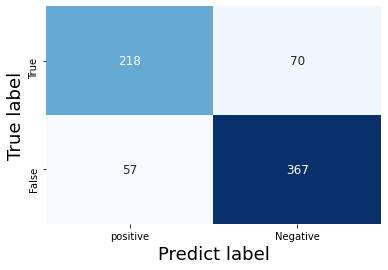

In [149]:
from sklearn.metrics import confusion_matrix
proba_each_row = model.predict_proba(data)
thereshhold = 0.5
con_max = confusion_matrix(y_true=target, y_pred=proba_each_row[:,1] > thereshhold,labels=[1, 0]) 
sns.heatmap(con_max,xticklabels= ['positive','Negative'],yticklabels=['True','False'], annot=True, cbar=False,cmap='Blues',fmt='g',annot_kws={'size':12},)
plt.xlabel('Predict label',fontsize=18)
plt.ylabel('True label',fontsize=18)



In [151]:
from sklearn.metrics import roc_curve
fpr_logistic,tpr_logistic,thresholds_logistic = roc_curve(target, proba_each_row[:,1])

from sklearn.metrics import precision_recall_curve

pr_logistic,rc_logistic, pr_rc_thre_logistic = precision_recall_curve(y_true=target,probas_pred=proba_each_row[:,1])

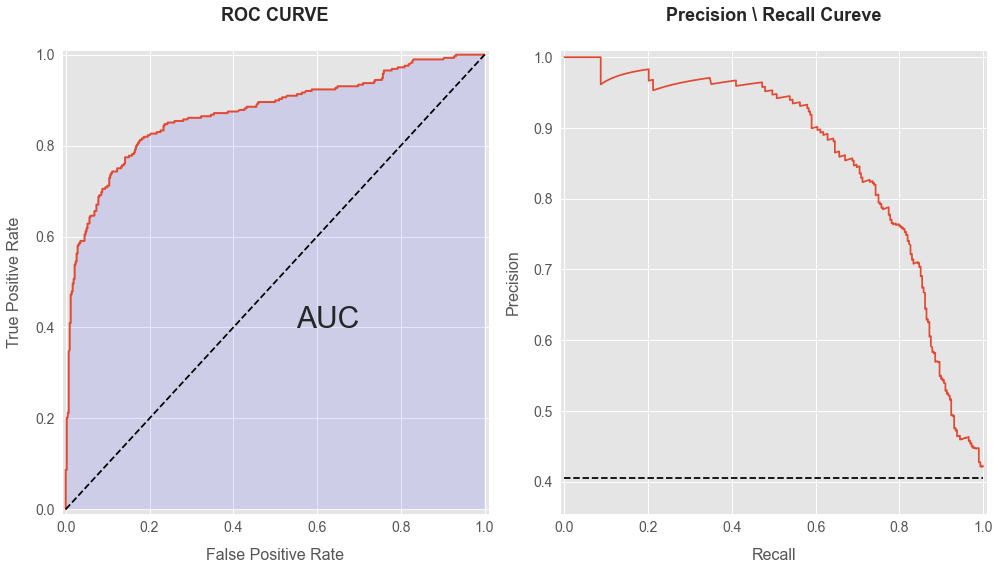

In [226]:
#dot
# plt.plot([fpr_logistic[index],fpr_logistic[index]],[tpr_logistic[index],tpr_logistic[index]],'ro')
# # y 
# plt.plot([0,fpr_logistic[index]],[tpr_logistic[index],tpr_logistic[index]],'r--')
# # x 
# plt.plot([fpr_logistic[index],fpr_logistic[index]],[0,tpr_logistic[index]],'r--')

### 가장 가까운 값 찾기 => 전체행에 대해 원하는 값을 뺀다음 0에 가장 근접한 경우를 찾는다.
x= 0.2
difference_array = np.absolute(fpr_logistic-x)
index = difference_array.argmin()

plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.plot(fpr_logistic,tpr_logistic,linewidth=2)
plt.title('ROC CURVE',fontsize=18,fontweight="bold",y=1.05)
plt.xlabel('False Positive Rate',fontsize=16,labelpad=13,)
plt.ylabel('True Positive Rate',fontsize=16,labelpad=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,1],[0,1],'k--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.fill_between(fpr_logistic,tpr_logistic, facecolor='blue',alpha=0.1)
plt.text(0.55,0.4, 'AUC', fontsize=30)

base_rate = target.mean()
plt.subplot(122)
plt.plot(rc_logistic,pr_logistic)
plt.title('Precision \ Recall Cureve',fontsize=18,fontweight="bold",y=1.05)
plt.xlabel('Recall',fontsize=16,labelpad=13)
plt.ylabel('Precision',fontsize=16,labelpad=13,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,1],[base_rate,base_rate],'k--')
plt.xlim(-0.01,1.01)
plt.ylim(base_rate-0.05,1.01)


plt.tight_layout()

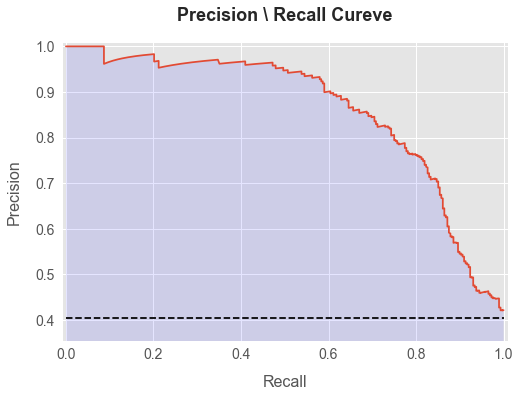

In [220]:
from sklearn.metrics import auc



base_rate = target.mean()
# plt.subplot(122)
plt.plot(rc_logistic,pr_logistic)
plt.title('Precision \ Recall Cureve',fontsize=18,fontweight="bold",y=1.05)
plt.xlabel('Recall',fontsize=16,labelpad=13)
plt.ylabel('Precision',fontsize=16,labelpad=13,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,1],[base_rate,base_rate],'k--')
plt.xlim(-0.01,1.01)
plt.ylim(base_rate-0.05,1.01)
